# EJERCICIOS

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

2025-01-14 18:17:31.773071: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## EJERCICIO 1


Supongamos que queremos predecir dos objetivos diferentes (por ejemplo, precio y categoría) a partir de dos conjuntos de características diferentes (por ejemplo, características visuales y características de texto de un producto).

* Características visuales: un conjunto de 128 características numéricas, que podrían representar, por ejemplo, valores de píxeles o características extraídas de imágenes.
* Características de texto: un conjunto de 256 características numéricas, representando posiblemente la codificación de texto o características lingüísticas.
* Precio (Salida 1): un valor numérico que representa el precio de un producto.
* Categoría (Salida 2): una etiqueta de categoría, que asumiremos que puede tomar 10 valores diferentes (por ejemplo, 10 categorías diferentes de productos).

Voy a generar datos aleatorios

In [3]:
# Generación de datos ficticios
num_muestras = 1000  # Número de muestras en el conjunto de datos

# Características visuales: 128 características numéricas
caracteristicas_visuales = np.random.rand(num_muestras, 128)

# Características de texto: 256 características numéricas
caracteristicas_texto = np.random.rand(num_muestras, 256)

# Precio (Salida 1): Valor numérico (por ejemplo, precio de un producto)
precio = np.random.rand(num_muestras, 1)

# Categoría (Salida 2): 10 categorías posibles (codificadas en one-hot)
categorias = np.random.randint(0, 10, size=(num_muestras, 1))
categorias_one_hot = tf.keras.utils.to_categorical(categorias, num_classes=10)

Divide los datos en entrenamiento y prueba

In [4]:
x_vis_train, x_vis_test, x_text_train, x_text_test, y_precio_train, y_precio_test, y_cat_train, y_cat_test = train_test_split(
    caracteristicas_visuales,
    caracteristicas_texto,
    precio,
    categorias_one_hot,
    test_size=0.2,
    random_state=42)

Construye el modelo:
* Crea dos ramas de entrada, una para cada tipo de características.
* Las ramas se fusionarán para predecir el precio.
* Una de las ramas se utilizará también para predecir la categoria.

El esquema es el siguiente:

<img src="datos/esquema_modelo_funcional.png" alt="esquema modelo funcional"/>

In [5]:
# Crear ramas
input_visual = tf.keras.layers.Input(shape=x_vis_train.shape[1:])
input_texto = tf.keras.layers.Input(shape=x_text_train.shape[1:])
rama_visual = tf.keras.layers.Dense(64, activation="relu")
rama_texto = tf.keras.layers.Dense(128, activation="relu")
combinacion = tf.keras.layers.Concatenate()
salida_categoria = tf.keras.layers.Dense(10, activation="softmax", name="salida_categoria")  # Softmax para clasificación One-Hot
salida_precio = tf.keras.layers.Dense(1, name="salida_precio")  # Sin activación de salida que queremos el precio, no un "si/no"

# Concatenar ramas
branch_rama_visual = rama_visual(input_visual)
branch_rama_texto = rama_texto(input_texto)
branch_combinacion = combinacion([branch_rama_visual, branch_rama_texto])
branch_salida_categoria = salida_categoria(branch_rama_texto)
branch_salida_precio = salida_precio(branch_combinacion)

# Crear el modelo
model = tf.keras.Model(inputs=[input_visual, input_texto], outputs=[branch_salida_categoria, branch_salida_precio])

Comprueba creando una imagen del modelo que es igual que el que se pide

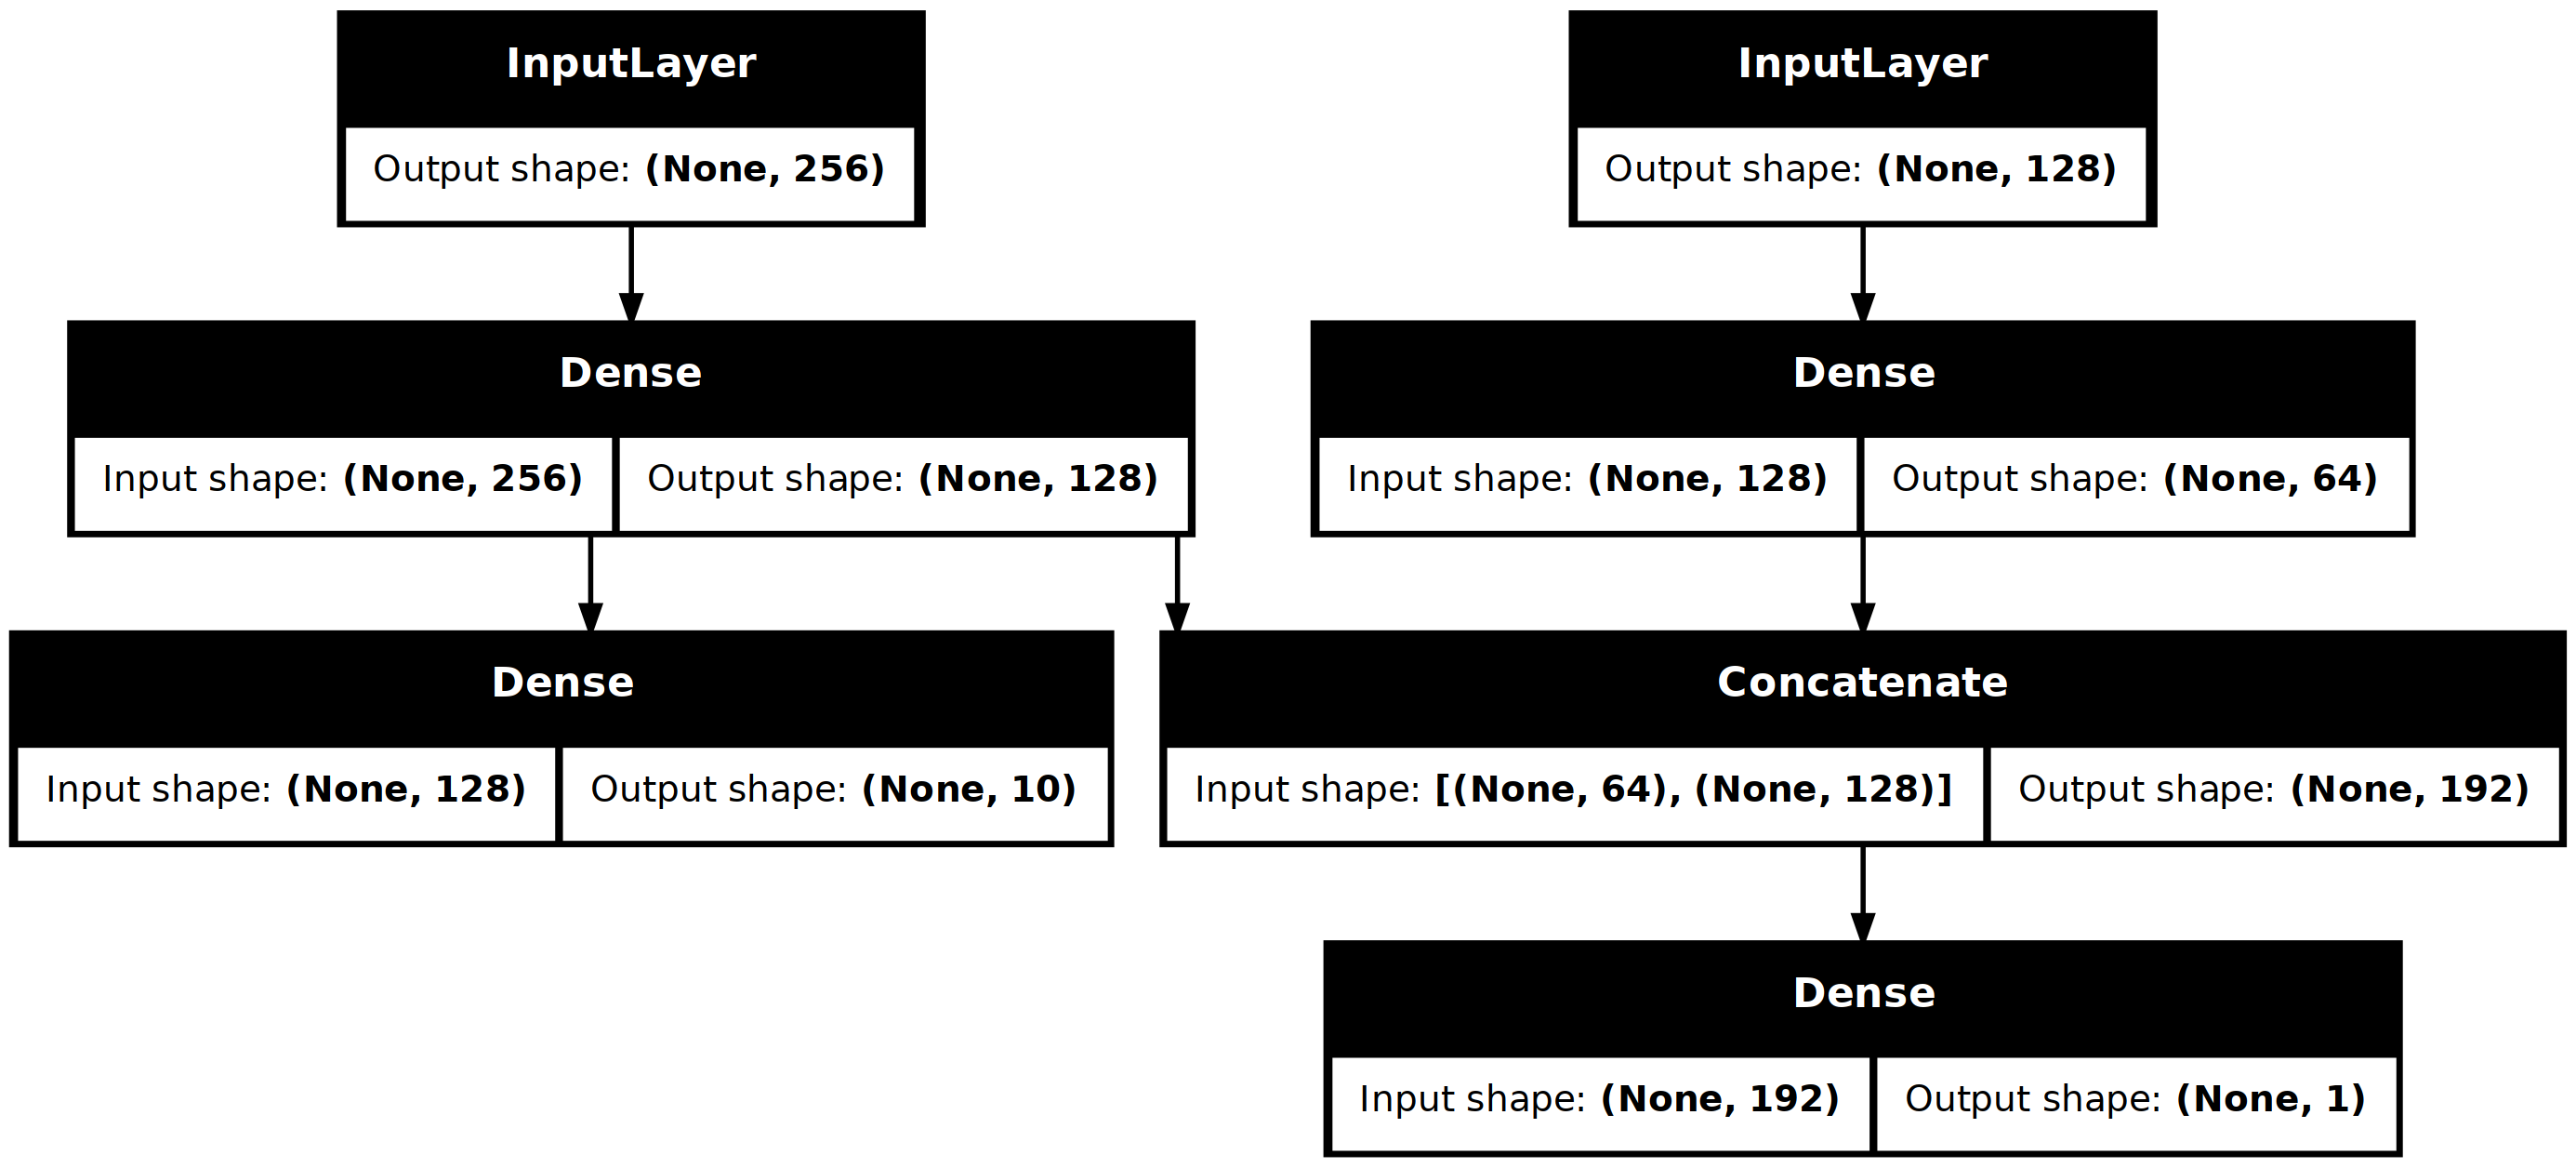

In [6]:
tf.keras.utils.plot_model(model, "Resultados/modelo_ejemplo.png", show_shapes=True)

Compila el modelo especificando las pérdidas y métricas para cada salida (utiliza el optimizador Adam)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss={
        "salida_categoria": "categorical_crossentropy", # Clasificacion
        "salida_precio": "mse" # Regresion
    },
    metrics={
        "salida_categoria": ["accuracy"], # Clasificacion
        "salida_precio": ["mae"] # Regresion
    }
)

Entrena el modelo 

In [8]:
model.fit(
    [x_vis_train, x_text_train],
    [y_cat_train, y_precio_train],
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10


/home/iabd/anaconda3/envs/notebook/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.6903 - salida_categoria_accuracy: 0.1212 - salida_categoria_loss: 2.3830 - salida_precio_loss: 0.3073 - salida_precio_mae: 0.4417 - val_loss: 2.5440 - val_salida_categoria_accuracy: 0.0938 - val_salida_categoria_loss: 2.3540 - val_salida_precio_loss: 0.1900 - val_salida_precio_mae: 0.3581
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4252 - salida_categoria_accuracy: 0.1623 - salida_categoria_loss: 2.2857 - salida_precio_loss: 0.1395 - salida_precio_mae: 0.3041 - val_loss: 2.4901 - val_salida_categoria_accuracy: 0.1063 - val_salida_categoria_loss: 2.3532 - val_salida_precio_loss: 0.1369 - val_salida_precio_mae: 0.3081
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3468 - salida_categoria_accuracy: 0.1631 - salida_categoria_loss: 2.2468 - salida_precio_loss: 0.1000 - salida_precio_mae: 0.2591 - val_loss: 2.4830 - val_salida_categoria_accuracy: 0.0688 - val_salida_categoria_loss: 2.3517 - val_salida_precio_loss:

Evalúa el modelo en el conjunto de pruebas

In [9]:
results = model.evaluate(
    [x_vis_test, x_text_test],  # Entradas de prueba
    [y_cat_test, y_precio_test]  # Salidas de prueba
)

# Desempaquetar los resultados
loss = results[0]
metrics_categoria = results[1]
metrics_precio = results[2]

print(f"Pérdida: {loss}")
print(f"Exactitud (Categoría): {metrics_categoria}")
print(f"Error absoluto medio (Precio): {metrics_precio}")

/home/iabd/anaconda3/envs/notebook/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.5787 - salida_categoria_accuracy: 0.1246 - salida_categoria_loss: 2.4327 - salida_precio_loss: 0.1495 - salida_precio_mae: 0.3025
Pérdida: 2.6206042766571045
Exactitud (Categoría): 2.465686798095703
Error absoluto medio (Precio): 0.16905577480793


## EJERCICIO 2

El objetivo de este ejercicio es entrenar un modelo en un subconjunto de clases (Modelo A) y luego usar este modelo para entrenar otro modelo en un subconjunto diferente de clases (Modelo B), primero sin y luego con el conocimiento transferido del Modelo A.

Carga los datos de CIFAR-10, representa alguna de sus imágenes con sus etiquetas, haz una lista con las etiquetas que tiene (busca en internet) y normaliza los datos dividiendo entre 255.0.

Divide los datos en conjuntos de entrenamiento, pruebas y validación para el modelo A y para el modelo B:
* El modelo A utiliza las clases "avión", "automóvil", "pájaro" y "gato"
* El modelo B utiliza las clases "ciervo", "perro", "rana" y "caballo" 

In [10]:
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Sacamos conjunto de validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalizamos externamente
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Definir las clases para cada modelo
model_a_classes = [0, 1, 2, 3]  # clases: avion, automovil, pajaro, gato
model_b_classes = [4, 5, 6, 7]  # clases: ciervo, perro, rana, caballo

# Filtrar las imágenes de entrenamiento para el Modelo A
model_a_train_mask = np.isin(y_train, model_a_classes).reshape(-1)
x_train_a = x_train[model_a_train_mask]
y_train_a = y_train[model_a_train_mask]

# Filtrar las imágenes de validación para el Modelo A
model_a_val_mask = np.isin(y_val, model_a_classes).reshape(-1)
x_val_a = x_val[model_a_val_mask]
y_val_a = y_val[model_a_val_mask]

# Filtrar las imágenes de prueba para el Modelo A
model_a_test_mask = np.isin(y_test, model_a_classes).reshape(-1)
x_test_a = x_test[model_a_test_mask]
y_test_a = y_test[model_a_test_mask]

# Filtrar las imágenes de entrenamiento para el Modelo B
model_b_train_mask = np.isin(y_train, model_b_classes).reshape(-1)
x_train_b = x_train[model_b_train_mask]
y_train_b = y_train[model_b_train_mask]

# Filtrar las imágenes de validación para el Modelo B
model_b_val_mask = np.isin(y_val, model_b_classes).reshape(-1)
x_val_b = x_val[model_b_val_mask]
y_val_b = y_val[model_b_val_mask]

# Filtrar las imágenes de prueba para el Modelo B
model_b_test_mask = np.isin(y_test, model_b_classes).reshape(-1)
x_test_b = x_test[model_b_test_mask]
y_test_b = y_test[model_b_test_mask]

# Definimos un diccionario de categorias para traducir las etiquetas
def get_category_name(label):
    categories = {
        0: "Avión",
        1: "Automóvil",
        2: "Pájaro",
        3: "Gato",
        4: "Ciervo",
        5: "Perro",
        6: "Rana",
        7: "Caballo",
        8: "Barco",
        9: "Camión"
    }
    return categories.get(label, "ERROR")

def display_image(data,tag=""):
    """
    Muestra una única imagen utilizando plt.imshow.

    Parámetros:
    - data: Imagen en formato numpy array (32x32x3, por ejemplo).
    Opcionales:
    - tag: Etiqueta de la imagen con un str del número a adivinar.
    """
    plt.figure(figsize=(2, 1)) # Hacer la imagen más pequeña
    plt.imshow(data)
    plt.axis('off')  # Ocultar los ejes
    if tag !="":
        plt.title(get_category_name(tag))
    plt.show()

def display_images_grid25(x_data, y_data):
    """
    Muestra las primeras 25 imágenes de los datos en un grid 5x5.
    
    Parámetros:
    - x_data: Datos de las imágenes (e.g. x_train o x_test).
    - y_data: Etiquetas correspondientes a las imágenes (e.g. y_train o y_test).
    """
    plt.figure(figsize=(6, 6))  # Tamaño de la cuadrícula 5x5
    
    for i in range(25):  # Mostrar las primeras 25 imágenes
        plt.subplot(5, 5, i + 1)  # Crear la subgrilla 5x5
        plt.imshow(x_data[i])  # Mostrar la imagen
        plt.axis('off')  # Ocultar los ejes
        label = y_data[i][0]  # Etiqueta (y_data está en forma de array de 1D)
        plt.title(get_category_name(label))  # Poner el título con el nombre de la categoría
    
    plt.tight_layout()  # Ajusta el espacio entre las imágenes
    plt.show()

Primeras 25 imágenes del conjunto A


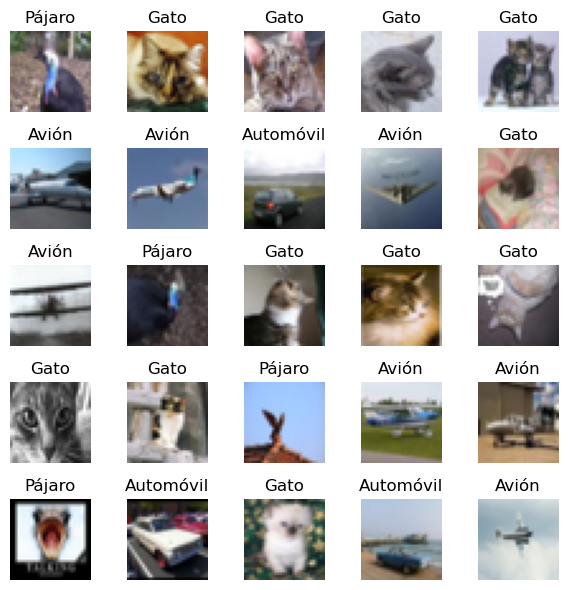

Primeras 25 imágenes del conjunto B


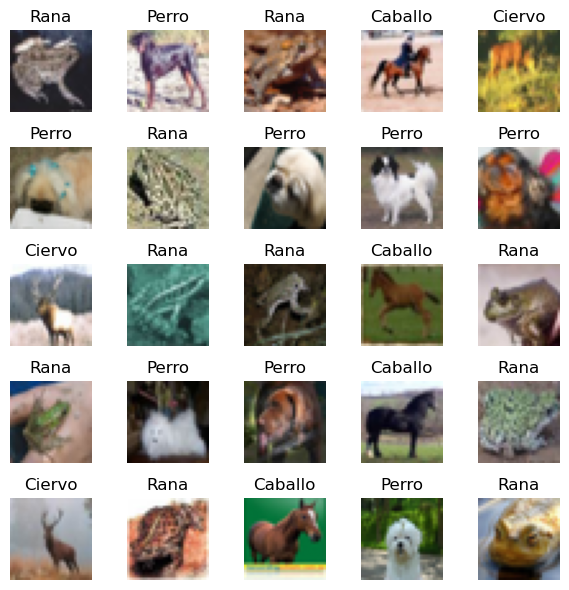

In [11]:
print("Primeras 25 imágenes del conjunto A")
display_images_grid25(x_train_a, y_train_a)
print("Primeras 25 imágenes del conjunto B")
display_images_grid25(x_train_b, y_train_b)

Entrena el Modelo A

In [12]:
# Crear el modelo A
model_A = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') # Tenemos 4 grupos
])

# Compilar el modelo
model_A.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definimos la ruta de los checkpoints
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint( "Checkpoints/4_7_2.weights.h5", save_weights_only=True)

# Definimos que el modelo pare si en 10 iteraciones no mejora
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Entrenar el modelo
history_A = model_A.fit(
x_train_a,
y_train_a,
epochs=100,
validation_data=(x_val_a, y_val_a),
callbacks=[checkpoint_cb, early_stopping_cb],
)

# Guardar el modelo
model_A.save("modelos/4_7_2/model_A.keras")

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4771 - loss: 1.1945 - val_accuracy: 0.6067 - val_loss: 0.9706
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6083 - loss: 0.9734 - val_accuracy: 0.6007 - val_loss: 0.9396
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6284 - loss: 0.9116 - val_accuracy: 0.6597 - val_loss: 0.8666
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6564 - loss: 0.8676 - val_accuracy: 0.6499 - val_loss: 0.8705
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6736 - loss: 0.8215 - val_accuracy: 0.6262 - val_loss: 0.9338
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6773 - loss: 0.8195 - val_accuracy: 0.6574 - val_loss: 0.8577
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6832 - loss: 0.8010 - val_accuracy: 0.6799 - val_loss: 0.8167
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6899 - loss: 0.7780 - val_accu

Entrenar el Modelo B desde 0

In [13]:
# Remapeamos las etiquetas de 4 a 7 en 0 a 3 que sino falla
y_train_b_map = y_train_b - 4
y_val_b_map = y_val_b - 4
y_test_b_map = y_test_b - 4

# Crear el modelo B
model_B = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') # Tenemos 4 grupos
])

# Compilar el modelo
model_B.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definimos la ruta de los checkpoints
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint( "Checkpoints/4_7_2_B.weights.h5", save_weights_only=True)

# Definimos que el modelo pare si en 10 iteraciones no mejora
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Entrenar el modelo
history_B = model_B.fit(
x_train_b,
y_train_b_map,
epochs=100,
validation_data=(x_val_b, y_val_b_map),
callbacks=[checkpoint_cb, early_stopping_cb],
)

# Guardar el modelo
model_B.save("modelos/4_7_2/model_B_raw.keras")

Epoch 1/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3912 - loss: 1.3278 - val_accuracy: 0.5094 - val_loss: 1.1375
Epoch 2/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5074 - loss: 1.1267 - val_accuracy: 0.5211 - val_loss: 1.1060
Epoch 3/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5392 - loss: 1.0699 - val_accuracy: 0.5546 - val_loss: 1.0376
Epoch 4/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5616 - loss: 1.0306 - val_accuracy: 0.5691 - val_loss: 1.0047
Epoch 5/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5724 - loss: 1.0000 - val_accuracy: 0.5924 - val_loss: 0.9933
Epoch 6/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5911 - loss: 0.9691 - val_accuracy: 0.5927 - val_loss: 0.9848
Epoch 7/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6012 - loss: 0.9582 - val_accuracy: 0.5830 - val_loss: 1.0020
Epoch 8/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6124 - loss: 0.9279 - val_accu

Entrenar el Modelo B utilizando las capas aprendidas del Modelo A (excepto la capa de salida)

In [14]:
tf.random.set_seed(42)
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(4, activation="softmax"))

# Se congela todas las capas del modelo A
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

# Se compila el modelo B sobre el modelo A con la función de pérdida binary_crossentropy, el optimizador SGD con learning_rate=0.001 y la métrica accuracy
model_B_on_A.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Se entrena el modelo B sobre el modelo A con 20 épocas y los datos de validación B 
history = model_B_on_A.fit(x_train_b, y_train_b_map, epochs=20, validation_data=(x_val_b, y_val_b_map))

# Se descongelan todas las capas del modelo A
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

# Se compila el modelo B sobre el modelo A con la función de pérdida binary_crossentropy, el optimizador SGD con learning_rate=0.001 y la métrica accuracy
model_B_on_A.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Se entrena el modelo B sobre el modelo A con 20 épocas y los datos de validación B 
history = model_B_on_A.fit(x_train_b, y_train_b_map, epochs=20, validation_data=(x_val_b, y_val_b_map))

Epoch 1/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3272 - loss: 1.7078 - val_accuracy: 0.4342 - val_loss: 1.2795
Epoch 2/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4463 - loss: 1.2502 - val_accuracy: 0.4690 - val_loss: 1.2104
Epoch 3/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4742 - loss: 1.1986 - val_accuracy: 0.4815 - val_loss: 1.1899
Epoch 4/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4815 - loss: 1.1823 - val_accuracy: 0.4843 - val_loss: 1.1815
Epoch 5/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4843 - loss: 1.1751 - val_accuracy: 0.4868 - val_loss: 1.1772
Epoch 6/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4866 - loss: 1.1715 - val_accuracy: 0.4886 - val_loss: 1.1748
Epoch 7/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4894 - loss: 1.1690 - val_accuracy: 0.4878 - val_loss: 1.1731
Epoch 8/20
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4902 - loss: 1.1674 - val_accuracy: 0.

Evaluar los dos modelos para el conjunto de datos B en el conjunto de pruebas

In [15]:
# Evaluando el modelo B  sobre el conjunto de test 
model_B.evaluate(x_test_b, y_test_b_map)

# Evaluando el modelo B sobre el modelo A  sobre el conjunto de test 
model_B_on_A.evaluate(x_test_b, y_test_b_map)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6130 - loss: 0.9262
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5875 - loss: 1.0478


[1.0463846921920776, 0.5899999737739563]

¿En este caso merece la pena?

In [16]:
# Congelar y descongelar ha hecho que mejore la accuracy pero no se iguala al modelo sin preentrenamiento
# Será más útil con modelos pesados por agilizar el proceso, pero en este caso no parece que merezca la pena